In [14]:
using QuantumCumulants
using ModelingToolkit, OrdinaryDiffEq
using Plots

# Define parameters
@cnumbers Δ g γ κ ν

# Define hilbert space
hf = FockSpace(:cavity)
ha = NLevelSpace(:atom,(:g,:e))
h = hf ⊗ ha

# Define the fundamental operators
#a = Destroy(h,:a)
#s = Transition(h,:σ,:g,:e)
@qnumbers a::Destroy(h) σ::Transition(h)

# Hamiltonian
#H = Δ*a'*a + g*(a'*s + a*s')

# Collapse operators
#J = [a,s,s']
#rates = [κ,γ,ν]

(a, σ)

In [15]:
@syms t::Real

(t,)

In [31]:
H = g*exp(-1im*t*Δ)*(a*σ(:g,:e)) + g*exp(1im*t*Δ)*(a'*σ(:e,:g))
#H = g*exp(-1im*t*Δ)*(a*s) + g*exp(+1im*t*Δ)*(a'*s')

(g*exp((0 - 1im)*t*Δ)*(a*σge)+g*exp((0 + 1im)*t*Δ)*(a′*σeg))

In [32]:
#eqs = meanfield(a'*a, H, J; rates=rates,order=2)
eqs = meanfield(a'*a, H, []; rates=[], order=2, iv=t)
complete!(eqs)

∂ₜ(⟨a′*a⟩) = (0 - 1im)*g*exp((0 + 1im)*t*Δ)*⟨a′*σeg⟩ + (0 + 1im)*g*exp((0 - 1im)*t*Δ)*⟨a*σge⟩
∂ₜ(⟨a′*σeg⟩) = (0 + 1im)*g*exp((0 - 1im)*t*Δ) + (0 - 2im)*g*(⟨a⟩*⟨a′*σee⟩ + ⟨σee⟩*⟨a′*a⟩ + ⟨a′⟩*⟨a*σee⟩ - 2⟨a′⟩*⟨a⟩*⟨σee⟩)*exp((0 - 1im)*t*Δ) + (0 - 1im)*g*⟨σee⟩*exp((0 - 1im)*t*Δ) + (0 + 1im)*g*exp((0 - 1im)*t*Δ)*⟨a′*a⟩
∂ₜ(⟨a⟩) = (0 - 1im)*g*⟨σeg⟩*exp((0 + 1im)*t*Δ)
∂ₜ(⟨a′*σee⟩) = (0 - 1im)*g*(⟨σeg⟩*⟨a′*a′⟩ + 2⟨a′⟩*⟨a′*σeg⟩ - 2(⟨a′⟩^2)*⟨σeg⟩)*exp((0 + 1im)*t*Δ) + (0 + 1im)*g*(⟨a′⟩*⟨a*σge⟩ + ⟨a⟩*⟨a′*σge⟩ + ⟨σge⟩*⟨a′*a⟩ - 2⟨a′⟩*⟨a⟩*⟨σge⟩)*exp((0 - 1im)*t*Δ) + (0 + 1im)*g*⟨σge⟩*exp((0 - 1im)*t*Δ)
∂ₜ(⟨σee⟩) = (0 - 1im)*g*exp((0 + 1im)*t*Δ)*⟨a′*σeg⟩ + (0 + 1im)*g*exp((0 - 1im)*t*Δ)*⟨a*σge⟩
∂ₜ(⟨σeg⟩) = (0 + 1im)*g*⟨a⟩*exp((0 - 1im)*t*Δ) + (0 - 2im)*g*exp((0 - 1im)*t*Δ)*⟨a*σee⟩
∂ₜ(⟨a′*a′⟩) = (0 + 2im)*g*exp((0 - 1im)*t*Δ)*⟨a′*σge⟩
∂ₜ(⟨a′*σge⟩) = (0 + 2im)*g*(⟨σee⟩*⟨a′*a′⟩ + 2⟨a′⟩*⟨a′*σee⟩ - 2(⟨a′⟩^2)*⟨σee⟩)*exp((0 + 1im)*t*Δ) + (0 - 1im)*g*exp((0 + 1im)*t*Δ)*⟨a′*a′⟩


In [33]:
@named sys = ODESystem(eqs)

Model sys with 8 equations
States (8):
  var"⟨a′*a⟩"(t)
  var"⟨a′*σeg⟩"(t)
  var"⟨a⟩"(t)
  var"⟨a′*σee⟩"(t)
⋮
Parameters (2):
  Δ
  g

In [34]:
states(sys)

8-element Vector{SymbolicUtils.BasicSymbolic{Complex}}:
 var"⟨a′*a⟩"(t)
 var"⟨a′*σeg⟩"(t)
 var"⟨a⟩"(t)
 var"⟨a′*σee⟩"(t)
 var"⟨σee⟩"(t)
 var"⟨σeg⟩"(t)
 var"⟨a′*a′⟩"(t)
 var"⟨a′*σge⟩"(t)

In [41]:
# Units
μs = 1
MHz = 1/μs

# state definition: ψ = cg|g> + ce|e>
ce_iv = 1
cg_iv = 0
a_iv = 4.5

# initial values:
σee_iv = abs(ce_iv)^2
σgg_iv = abs(cg_iv)^2
σeg_iv = conj(ce_iv)*cg_iv
σge_iv = conj(cg_iv)*ce_iv

ω0 = 2MHz
δ = 0.1MHz
g_ = 0.1MHz

u0 = ComplexF64[abs(a_iv*a_iv), conj(a_iv)*σeg_iv, σee_iv, conj(a_iv), a_iv*σee_iv, σge_iv, a_iv*a_iv, a_iv*σeg_iv]
p0 = (Δ=>2π*δ, g=>2π*g_)

(Δ => 0.6283185307179586, g => 0.6283185307179586)

In [42]:
t1 = 50μs
t_list = range(0, t1, length=1000)

prob = ODEProblem(sys, u0, (0.0, t1), p0)
sol = solve(prob, RK4())

┌ Warning: dt(7.105427357601002e-15) <= dtmin(7.105427357601002e-15) at t=4.735232250043226, and step error estimate = 0.5084006212286812. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/leonbello/.julia/packages/SciMLBase/jLzip/src/integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: 3rd order Hermite
t: 670-element Vector{Float64}:
 0.0
 1.5352925000249063e-5
 0.00016888217500273968
 0.001704174675027646
 0.006566887666572922
 0.015105445176733222
 0.026553214317895348
 0.041972344439103616
 0.060834805140240436
 0.08340422316530915
 ⋮
 4.735232250043162
 4.735232250043171
 4.73523225004318
 4.735232250043189
 4.735232250043197
 4.735232250043205
 4.735232250043212
 4.735232250043219
 4.735232250043226
u: 670-element Vector{Vector{ComplexF64}}:
 [20.25 + 0.0im, 0.0 + 0.0im, 1.0 + 0.0im, 4.5 + 0.0im, 4.5 + 0.0im, 0.0 + 0.0im, 20.25 + 0.0im, 0.0 + 0.0im]
 [20.249999984599317 + 6.349820953093356e-30im, -7.700341655710478e-9 - 0.0015965002617417785im, 0.9999999996277781 - 1.1968830747139786e-15im, 4.499999955403157 + 6.732467156347531e-16im, 4.499999984599317 + 6.349820953093356e-30im, -3.722219520612228e-10 - 7.717221794023293e-5im, 20.24999998492501 + 4.847376458803641e-14im, -7.537494552088472e-9 + 0.0015627374163258729im]
 [20

In [43]:
# # Numerical solution
# ps = (Δ, g, γ, κ, ν)
# @named sys = ODESystem(eqs)
# u0 = zeros(ComplexF64, length(eqs))
# p0 = (0, 1.5, 0, 0, 0)
# prob = ODEProblem(sys,u0,(0.0,50.0),ps.=>p0)
# sol = solve(prob,RK4())

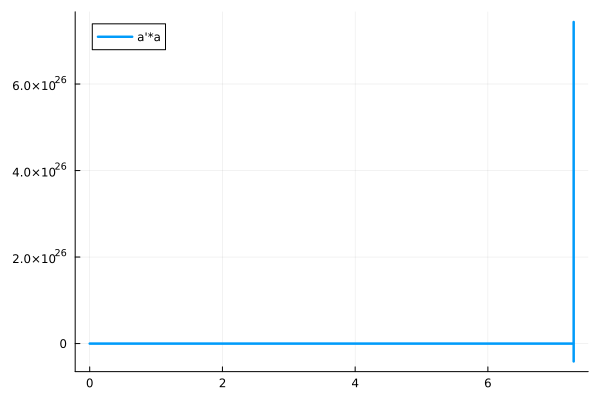

In [40]:
plot(sol.t, real.(sol[a'*a]), lw=2.5, label="a'*a")